In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.options.display.max_columns = 100

from splitting import Splitting
from analysis import AnalysisMetrics
from hyperparams import Hyperparameters
from modeling import Model 

print(pd.__version__)


0.24.2


In [4]:
model = Model(model_name='test')

In [7]:
params = {0.0: {'colsample_bytree': 0.75,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 3,
  'min_child_weight': 19.0,
  'n_estimators': 45,
  'reg_alpha': 0.65,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.8,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.5}}

model.create(
    params=params,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    target='total_units',
    cat_feature='vf_category',
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2')

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 


In [8]:
model.get_info()

--- Model Information ---
Name: test
feature_filename: ./outputs/im_feature_info_dict_mars_ru_20210212.txt
output_dir: outputs
data_filename : ../data/20210212_mars_ru_prod_trainset.msgpack
filter_filename : ./outputs/im_data_retrieval-v6-20210212.txt
target : total_units
future_data_filename : ../data/20210212_mars_ru_prod_futureset.msgpack
future_target : total_units_2
filter_data : Not defined
filter_future_data : Not defined
metrics_data : Not defined
metrics_future_data : Not defined
account_filter : [u'5Pyaterochka (X5)' u'Metro' u'Lenta' u'Dixy' u'Okey Group' u'Magnit']
-------------------------


In [9]:
model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

In [15]:
features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]

model.set_features(features)
# model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

model.train()

Model for 0.0 trained
The model is trained


No handlers could be found for logger "vf_portalytics.ml_helpers"


In [16]:
analysis_metrics = AnalysisMetrics(model=model,
                                   number_tests=10,
                                   use_product_filter=True,
                                   filter_threshold=300)

Data filter initializing...
Test iteration 1 of 10
Test iteration 6 of 10
Future data filter initializing...
Evaluating the Model for historic data...
Test iteration 1 of 10
Test iteration 6 of 10
Evaluating the Model for future data...


In [17]:
model.update_info(analysis_metrics)
model.save()

The model is saved


Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
The model is loaded


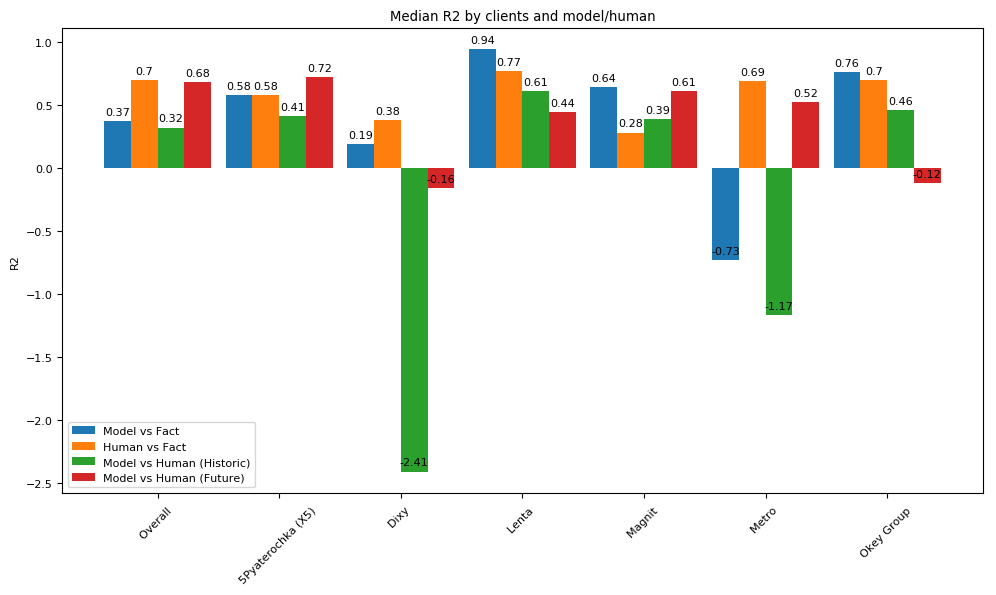

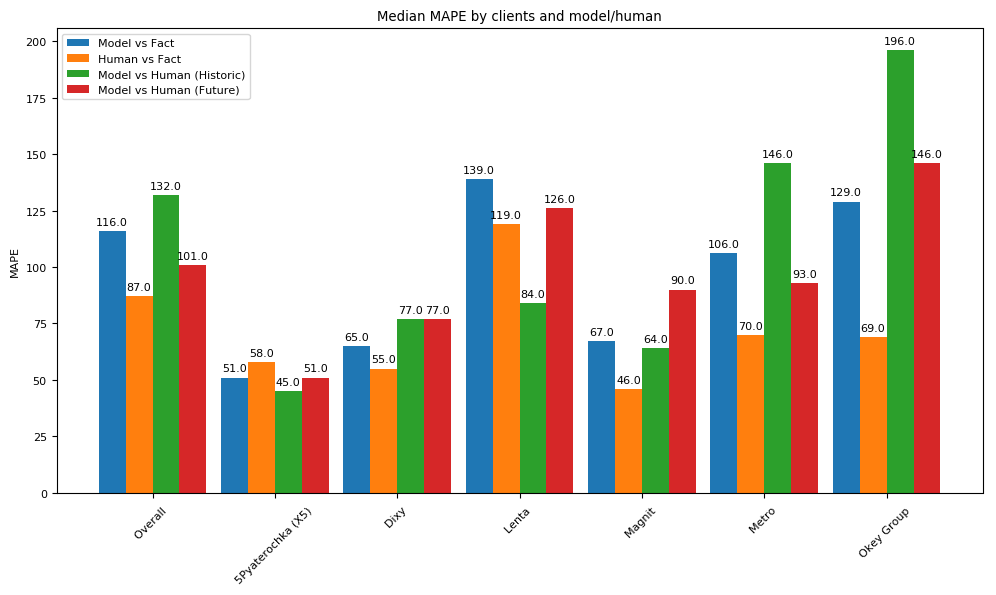

In [23]:
model = Model(model_name="20210212_im_mru_account")
model.load()
analysis_metrics = AnalysisMetrics(model=model,
                                   reevaluate=False,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)

analysis_metrics.plot_metrics(metric_filter=['r2','mape'])

In [3]:
# Load the model
model = Model(model_name="20210212_im_mru_accounts_all_params_as_for_lenta")
model.load()
# model.apply_account_filter(['5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit'])
model.get_info()
analysis_metrics = AnalysisMetrics(model=model)
analysis_metrics.plot_metrics(metric_filter=['r2'])

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
The model is loaded
--- Model Information ---
Name: 20210212_im_mru_accounts_all_params_as_for_lenta
feature_filename: ./outputs/im_feature_info_dict_mars_ru_20210212.txt
output_dir: outputs
data_filename : ../data/20210212_mars_ru_prod_trainset.msgpack
filter_filename : ./outputs/im_data_retrieval-v6-20210212.txt
target : total_units
future_data_filename : ../data/20210212_mars_ru_prod_futureset.msgpack
future_target : total_units_2
filter_data : Defined
filter_future_data : Defined
metrics_data : Defined
metrics_future_data : Defined
account_filter : [u'5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit']
-------------------------


Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
Model for 5Pyaterochka (X5) trained
Model for Dixy trained
Model for Lenta trained
Model for Magnit trained
Model for Metro trained
Model for Okey Group trained
The model is trained
Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of

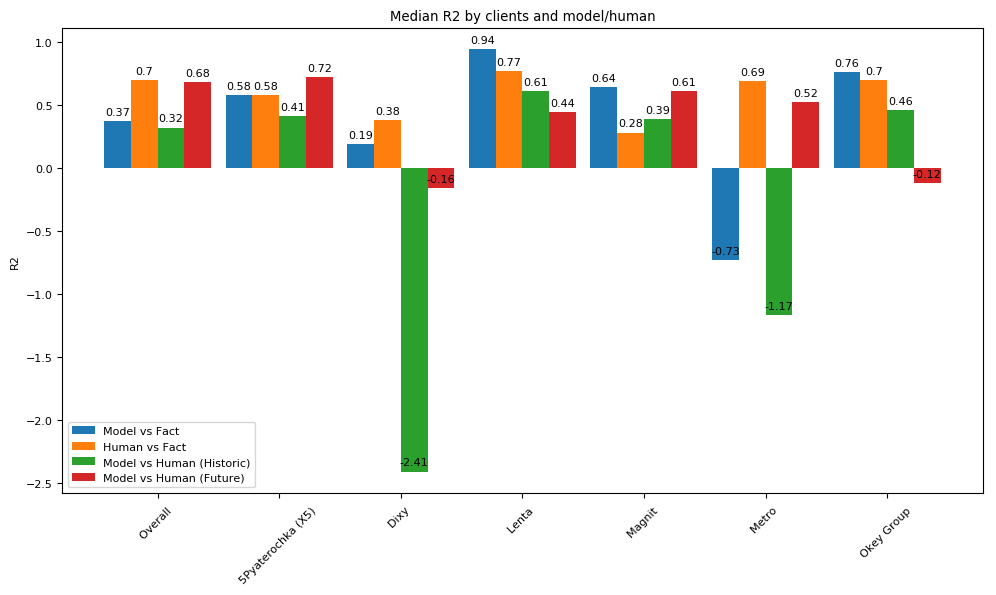

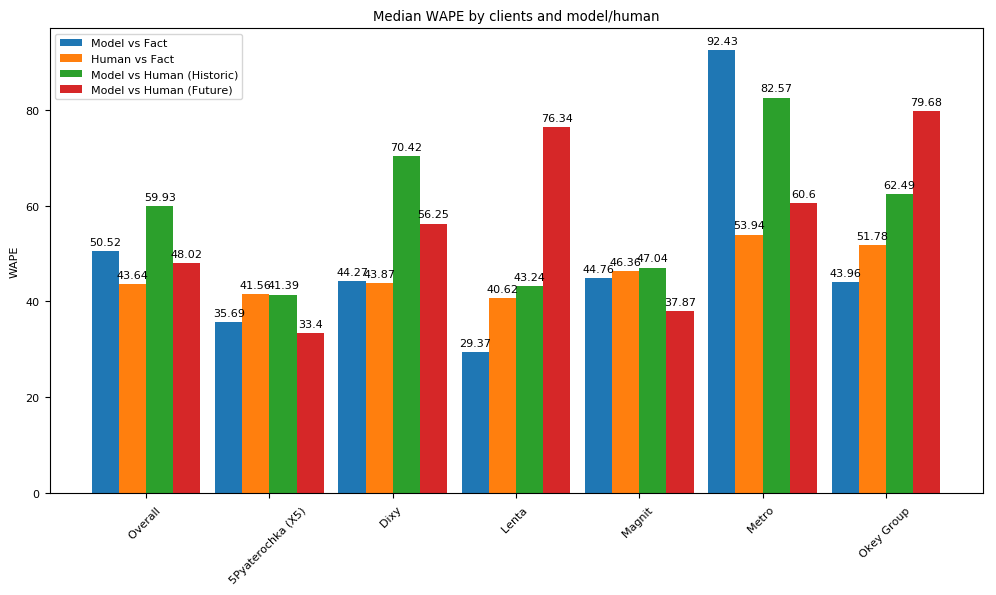

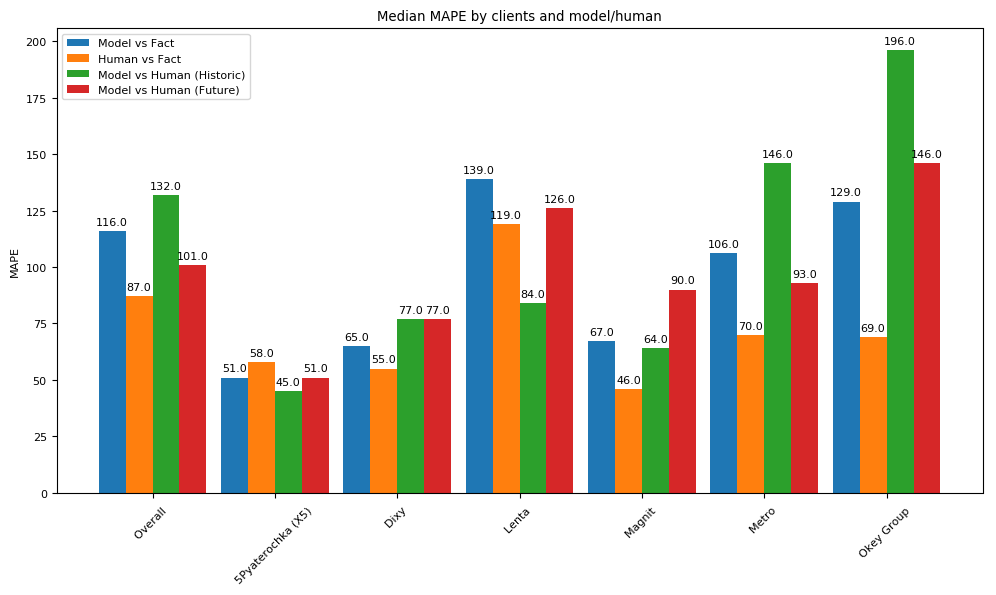

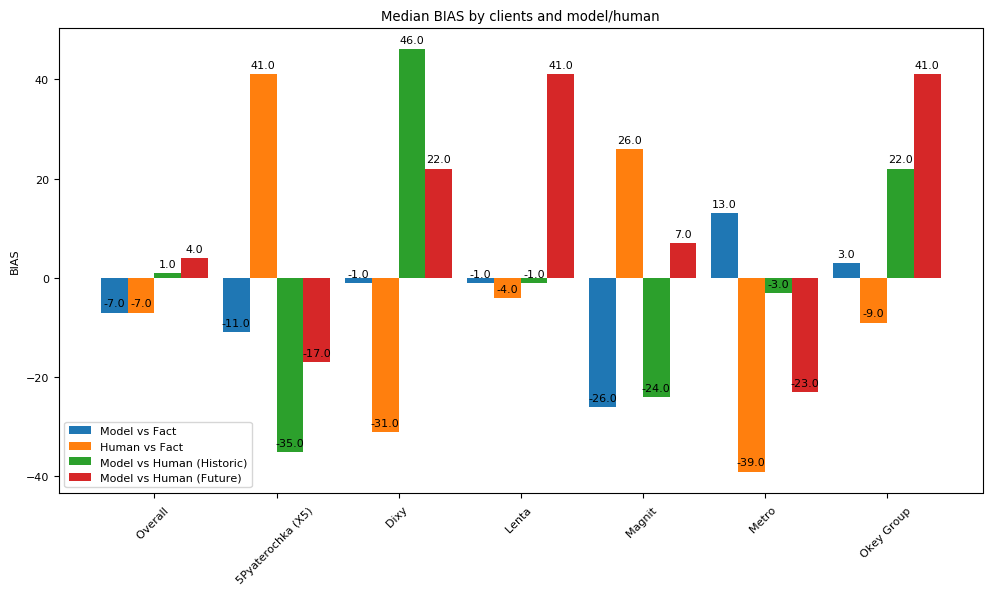

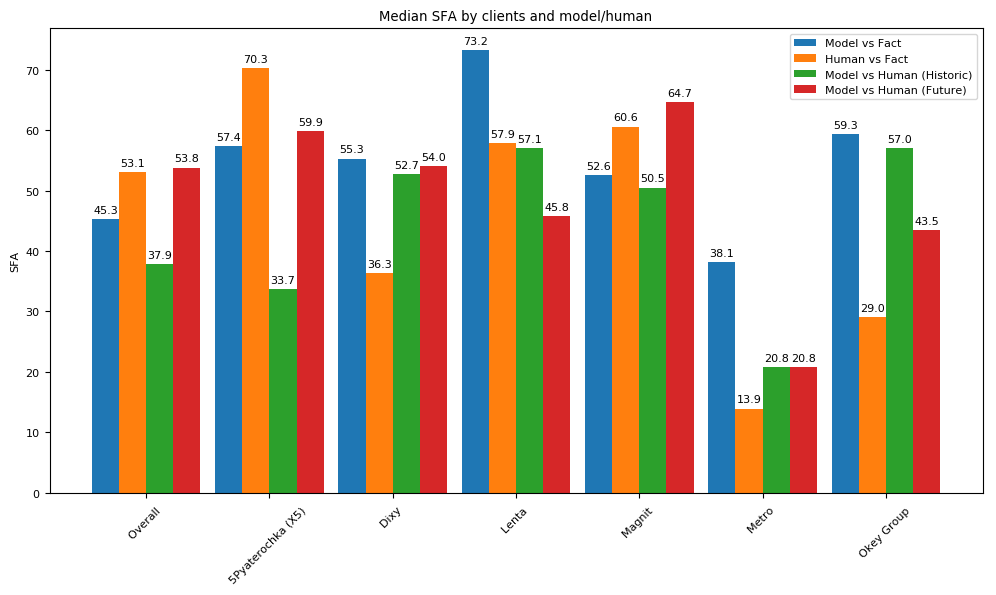

AssertionError: 

In [5]:
model = Model(model_name="20210212_im_mru_account")

# params = {0.0: {'colsample_bytree': 0.75,
#   'gamma': 0.8500000000000001,
#   'learning_rate': 0.06,
#   'max_depth': 3,
#   'min_child_weight': 19.0,
#   'n_estimators': 45,
#   'reg_alpha': 0.65,
#   'reg_lambda': 1.2000000000000002,
#   'subsample': 0.8,
#   'transformer_nominal': 'TargetEncoder',
#   'transformer_ordinal': 'OrdinalEncoder',
#   'under_predict_weight': 2.5}}

params = {u'5Pyaterochka (X5)': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Dixy': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Magnit': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Metro': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Okey Group': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0}}

model.create(
    params=params,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    target='total_units',
    cat_feature='account_banner',
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2')

features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]

model.set_features(features)
# model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

model.train()

analysis_metrics = AnalysisMetrics(model=model,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)
model.update_info(analysis_metrics)
model.save()

analysis_metrics.plot_metrics()

assert False

In [6]:
model.save('20210212_im_mru_accounts_all_params_as_for_lenta')

The model is saved


In [ ]:
# dir(model)
# model.clusters
# model.cat_feature
# model.selected_features
# model.params

In [9]:
# Load the model
model = Model(model_name="20210212_im_mru_accounts_all_params_as_for_lenta")
model.load()
model.apply_account_filter(['5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit'])
model.get_info()

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
The model is loaded
--- Model Information ---
Name: 20210212_im_mru_accounts_all_params_as_for_lenta
feature_filename: ./outputs/im_feature_info_dict_mars_ru_20210212.txt
output_dir: outputs
data_filename : ../data/20210212_mars_ru_prod_trainset.msgpack
filter_filename : ./outputs/im_data_retrieval-v6-20210212.txt
target : total_units
future_data_filename : ../data/20210212_mars_ru_prod_futureset.msgpack
future_target : total_units_2
filter_data : Defined
filter_future_data : Defined
metrics_data : Defined
metrics_future_data : Defined
account_filter : ['5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit']
-------------------------


Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Evaluating the Model for future data...


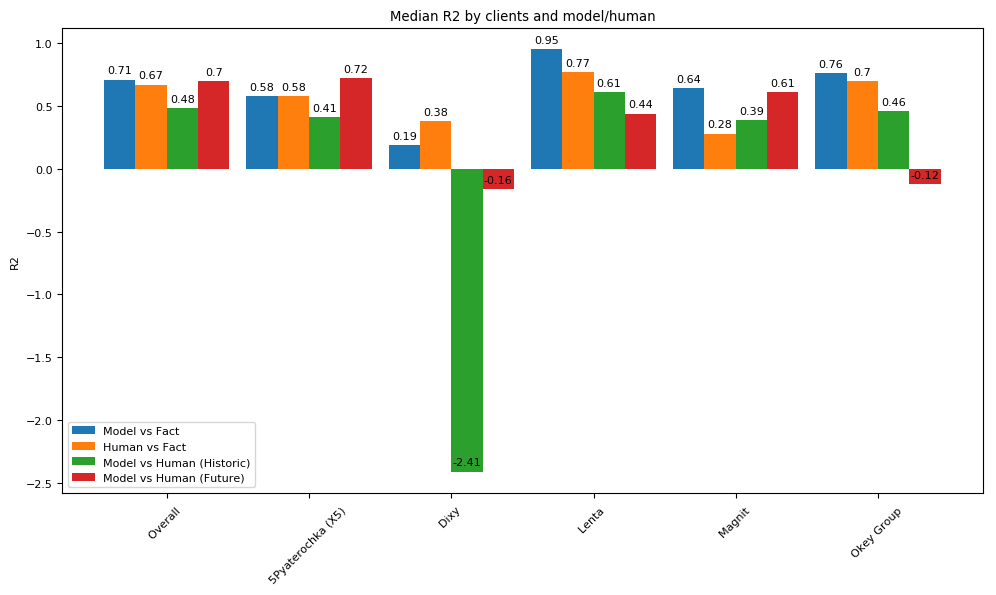

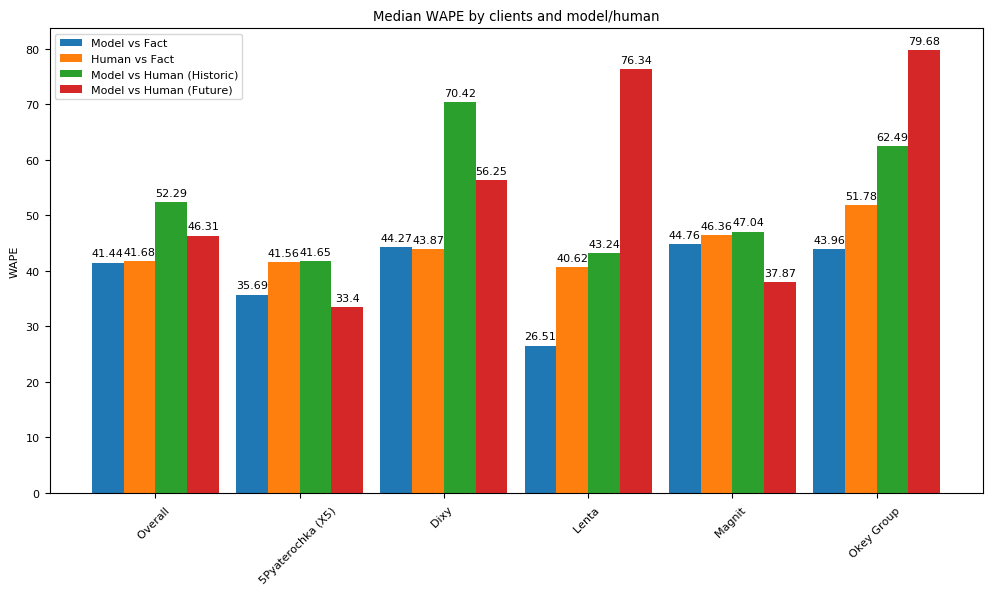

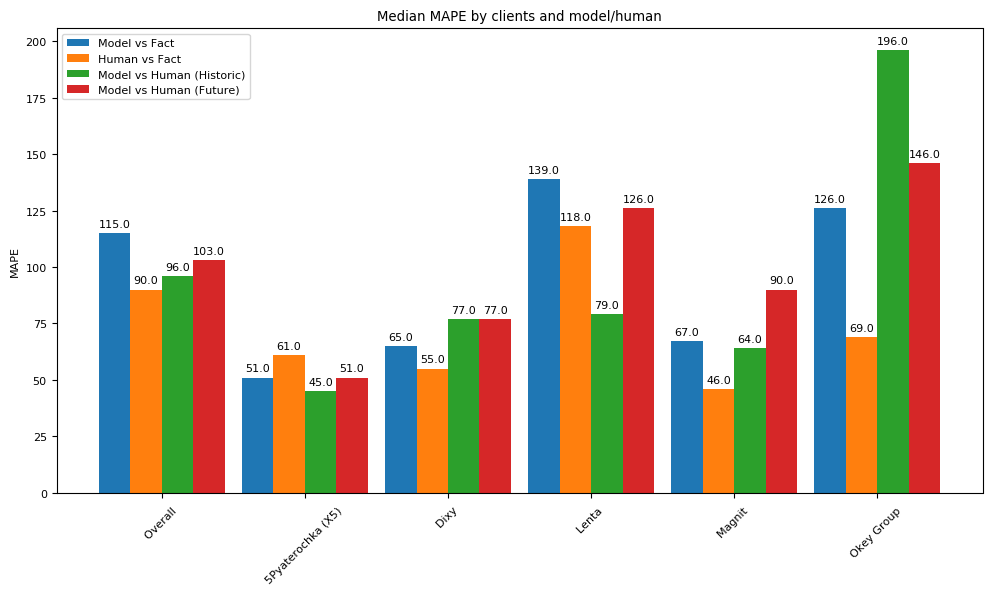

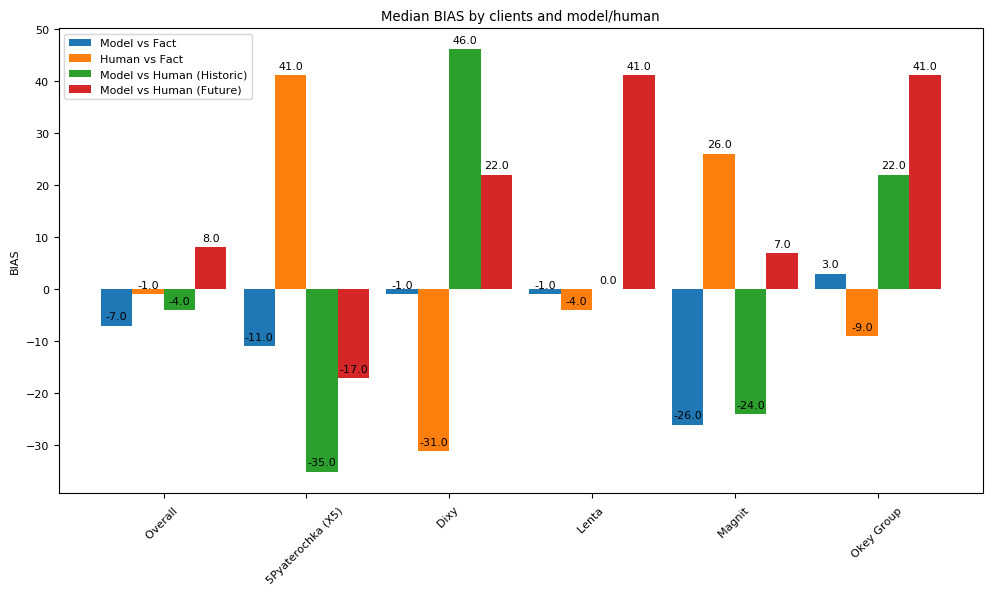

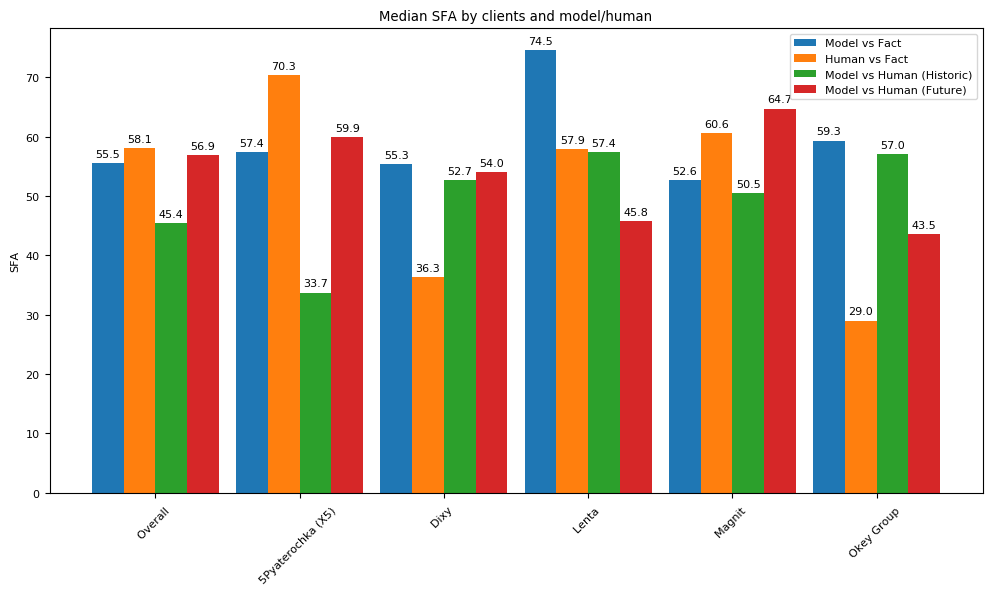

In [11]:
analysis_metrics = AnalysisMetrics(model=model,
                                   reevaluate=True,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)

analysis_metrics.plot_metrics()

In [12]:
model.update_info(analysis_metrics)
model.save()

The model is saved


In [ ]:
assert False

In [ ]:
analysis_metrics.plot_metrics()
# analysis_metrics.metric_quantiles('r2')
# analysis_metrics.median_overall_metrics()
# analysis_metrics.median_account_metrics()
# model.get_accounts()

In [ ]:
params = {u'5Pyaterochka (X5)': {'colsample_bytree': 0.75,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.1,
  'max_depth': 2,
  'min_child_weight': 2.0,
  'n_estimators': 52,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.6000000000000001,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.5},
 u'Dixy': {'colsample_bytree': 0.5,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.07,
  'max_depth': 4,
  'min_child_weight': 2.0,
  'n_estimators': 122,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.65,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Magnit': {'colsample_bytree': 0.8,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.07,
  'max_depth': 2,
  'min_child_weight': 20.0,
  'n_estimators': 160,
  'reg_alpha': 0.5,
  'reg_lambda': 1.05,
  'subsample': 0.8,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Metro': {'colsample_bytree': 0.65,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.09,
  'max_depth': 2,
  'min_child_weight': 2.0,
  'n_estimators': 11,
  'reg_alpha': 1.0,
  'reg_lambda': 1.4000000000000001,
  'subsample': 0.45,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Okey Group': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.08,
  'max_depth': 4,
  'min_child_weight': 1.0,
  'n_estimators': 34,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0}}